# HR: Employee   `Data Analysis`

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Uncleaned_employees_final_dataset (1).csv')
df.head()

employee_id         department     region  education gender  \
0         8724         Technology  region_26  Bachelors      m   
1        74430                 HR   region_4  Bachelors      f   
2        72255  Sales & Marketing  region_13  Bachelors      m   
3        38562        Procurement   region_2  Bachelors      f   
4        64486            Finance  region_29  Bachelors      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met_more_than_80  awards_won  avg_training_score  
0                  1                      1           0                  77  
1                  5                      0           0                  51  
2                  4                      0           0                  47  
3                  9                      0           0                  65  
4                  7                      0           0                  61

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [4]:
df.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  17417.000000     17417.000000  17417.000000          16054.000000   
mean   39083.491129         1.250732     34.807774              3.345459   
std    22707.024087         0.595692      7.694046              1.265386   
min        3.000000         1.000000     20.000000              1.000000   
25%    19281.000000         1.000000     29.000000              3.000000   
50%    39122.000000         1.000000     33.000000              3.000000   
75%    58838.000000         1.000000     39.000000              4.000000   
max    78295.000000         9.000000     60.000000              5.000000   

       length_of_service  KPIs_met_more_than_80    awards_won  \
count       17417.000000           17417.000000  17417.000000   
mean            5.801860               0.358845      0.023368   
std             4.175533               0.479675      0.151074   
min             1.000000               0.000000      0.000000   
25%             3.000000               0.000000      0.000000   
50%             5.000000               0.000000      0.000000   
75%             7.000000               1.000000      0.000000   
max            34.000000               1.000000      1.000000   

       avg_training_score  
count        17417.000000  
mean            63.176322  
std             13.418179  
min             39.000000  
25%             51.000000  
50%             60.000000  
75%             75.000000  
max             99.000000

## Data Cleaning

In [5]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [6]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [7]:
# Null values percentage of total data
df.isnull().sum() / len (df)  * 100

employee_id              0.000000
department               0.000000
region                   0.000000
education                4.426710
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.825688
length_of_service        0.000000
KPIs_met_more_than_80    0.000000
awards_won               0.000000
avg_training_score       0.000000
dtype: float64

In [8]:
# drop null values of education

df.dropna(subset = ['education'], inplace = True)

In [9]:
df['previous_year_rating'].unique()

array([nan,  3.,  1.,  2.,  4.,  5.])

In [10]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())

In [11]:
df.isnull().sum()

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

In [12]:
df.duplicated().sum()

2

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.head()

employee_id         department     region  education gender  \
0         8724         Technology  region_26  Bachelors      m   
1        74430                 HR   region_4  Bachelors      f   
2        72255  Sales & Marketing  region_13  Bachelors      m   
3        38562        Procurement   region_2  Bachelors      f   
4        64486            Finance  region_29  Bachelors      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   3.0   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met_more_than_80  awards_won  avg_training_score  
0                  1                      1           0                  77  
1                  5                      0           0                  51  
2                  4                      0           0                  47  
3                  9                      0           0                  65  
4                  7                      0           0                  61

In [15]:
df = df.rename(columns = {'KPIs_met_more_than_80': 'kpi > 80' , 'no_of_trainings' : 'total_trainings' ,
                          'previous_year_rating' : 'previous_rating' , 'length_of_service' : 'tenure',
                          'avg_training_score' : 'avg_score' , 'awards_won' : 'total_awards'} )

df.drop(columns='employee_id' , inplace=True)

In [16]:
df.head()

department     region  education gender recruitment_channel  \
0         Technology  region_26  Bachelors      m            sourcing   
1                 HR   region_4  Bachelors      f               other   
2  Sales & Marketing  region_13  Bachelors      m               other   
3        Procurement   region_2  Bachelors      f               other   
4            Finance  region_29  Bachelors      m            sourcing   

   total_trainings  age  previous_rating  tenure  kpi > 80  total_awards  \
0                1   24              3.0       1         1             0   
1                1   31              3.0       5         0             0   
2                1   31              1.0       4         0             0   
3                3   31              2.0       9         0             0   
4                1   30              4.0       7         0             0   

   avg_score  
0         77  
1         51  
2         47  
3         65  
4         61

In [17]:
def map_region(region):
    if region in ['region_1' , 'region_2' , 'region_3' , 'region_4' , 'region_5',
                  'region_6' , 'region_7' , 'region_8' , 'region_9' , 'region_10']:

        return 'Province_1'

    elif region in ['region_11' , 'region_12' , 'region_13' , 'region_14' , 'region_15',
                  'region_16' , 'region_17' , 'region_18' , 'region_19' , 'region_20']:
        return 'Province_2'

    elif region in ['region_21' , 'region_22' , 'region_23' , 'region_24' , 'region_25',
                  'region_26' , 'region_27' , 'region_28' , 'region_29' , 'region_30']:
        return 'Province_3'

    elif region in ['region_31' , 'region_32' , 'region_33' , 'region_34' , 'region_35',
                  'region_36' , 'region_37' , 'region_38' , 'region_39' , 'region_40']:
        return 'Province_4'
    else:
        return 'Province_5'

In [18]:
df['province'] = df['region'].apply(map_region)

In [19]:
df.head()

department     region  education gender recruitment_channel  \
0         Technology  region_26  Bachelors      m            sourcing   
1                 HR   region_4  Bachelors      f               other   
2  Sales & Marketing  region_13  Bachelors      m               other   
3        Procurement   region_2  Bachelors      f               other   
4            Finance  region_29  Bachelors      m            sourcing   

   total_trainings  age  previous_rating  tenure  kpi > 80  total_awards  \
0                1   24              3.0       1         1             0   
1                1   31              3.0       5         0             0   
2                1   31              1.0       4         0             0   
3                3   31              2.0       9         0             0   
4                1   30              4.0       7         0             0   

   avg_score    province  
0         77  Province_3  
1         51  Province_1  
2         47  Province_2  
3         65  Province_1  
4         61  Province_3

In [20]:
df.drop(columns='region' , inplace=True)

In [21]:
df['department'].unique()

array(['Technology', 'HR', 'Sales & Marketing', 'Procurement', 'Finance',
       'Analytics', 'Operations', 'Legal', 'R&D'], dtype=object)

In [22]:
mapping  = {'Technology' : 'Technology & Analytics',
             'Analytics' : 'Technology & Analytics',
             'Procurement' : 'Procurement & Finance',
             'Finance' : 'Procurement & Finance',
             'Operations' : 'Operations & Legal',
             'Legal' : 'Operations & Legal',}

df['departments'] = df['department'].replace(mapping)

df.drop(columns='department' , inplace=True)

In [23]:
df.head()

education gender recruitment_channel  total_trainings  age  \
0  Bachelors      m            sourcing                1   24   
1  Bachelors      f               other                1   31   
2  Bachelors      m               other                1   31   
3  Bachelors      f               other                3   31   
4  Bachelors      m            sourcing                1   30   

   previous_rating  tenure  kpi > 80  total_awards  avg_score    province  \
0              3.0       1         1             0         77  Province_3   
1              3.0       5         0             0         51  Province_1   
2              1.0       4         0             0         47  Province_2   
3              2.0       9         0             0         65  Province_1   
4              4.0       7         0             0         61  Province_3   

              departments  
0  Technology & Analytics  
1                      HR  
2       Sales & Marketing  
3   Procurement & Finance  
4   Procurement & Finance

# Exploratory Data Analysis

## Employee Educaton

In [24]:
df['education'].value_counts().reset_index()

education  count
0        Bachelors  11517
1  Masters & above   4841
2  Below Secondary    286

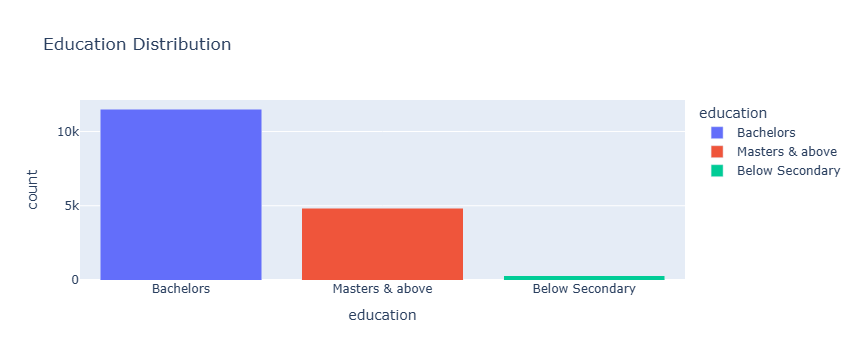

In [40]:
px.bar(df['education'].value_counts().reset_index() , x='education' , y='count'  ,
                                                       barmode='stack' , title='Education Distribution' , color='education')

### `Insights`

- Most of the employees are undergraduates with Bachelors and some of the employees have done the Masters as well
- Few employees have the below secondary level

---

## Department with most Employees

In [26]:
df['departments'].value_counts().reset_index()

departments  count
0       Sales & Marketing   4957
1      Operations & Legal   3789
2  Technology & Analytics   3753
3   Procurement & Finance   3001
4                      HR    821
5                     R&D    323

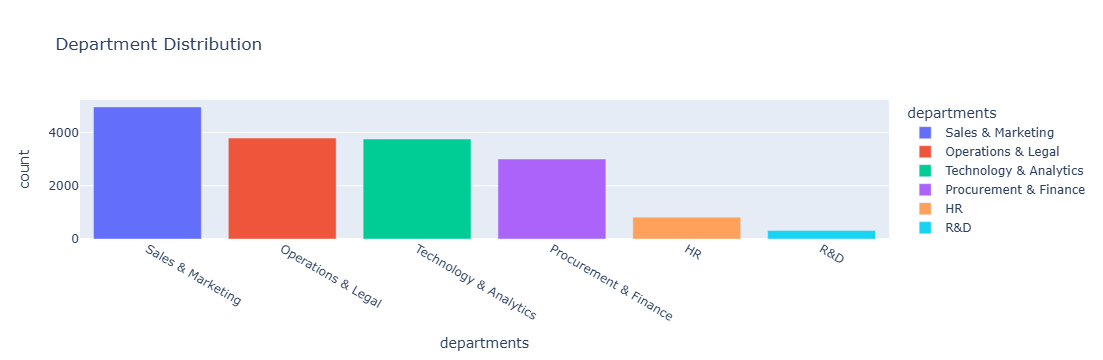

In [27]:
px.bar(df['departments'].value_counts().reset_index() , y='count' , x='departments' ,  title='Department Distribution' , color='departments')

---

## Province with most Employees

In [28]:
df['province'].value_counts().reset_index()

province  count
0  Province_1   6912
1  Province_3   4895
2  Province_2   3723
3  Province_4   1114

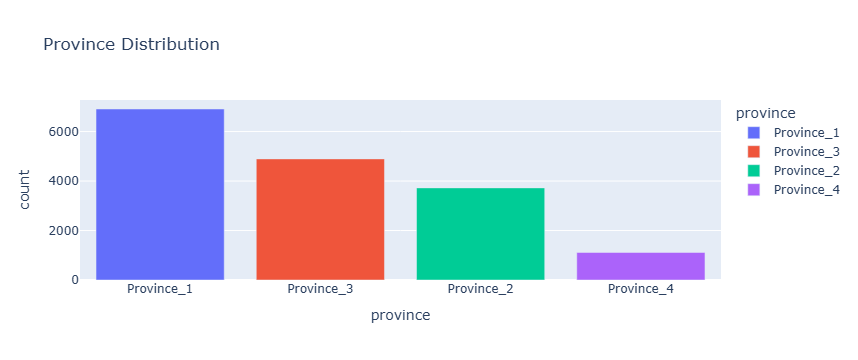

In [29]:
px.bar(df['province'].value_counts().reset_index() , x='province' , y='count' , title='Province Distribution'
                                                 , color='province')

---

## Performance by Genders


In [30]:
df.columns

Index(['education', 'gender', 'recruitment_channel', 'total_trainings', 'age',
       'previous_rating', 'tenure', 'kpi > 80', 'total_awards', 'avg_score',
       'province', 'departments'],
      dtype='object')

In [31]:
gender = df.groupby('gender').agg(

    total_trainings = ('total_trainings' , 'sum'),
    avg_score = ('avg_score' , 'mean') ,
    total_awards = ('total_awards' , 'sum'),
    kpi = ('kpi > 80' , 'sum'),
    avg_tenure = ('tenure' , 'mean'),
    avg_rating = ('previous_rating' , 'mean'),
    avg_age = ('age' , 'mean')
).reset_index()


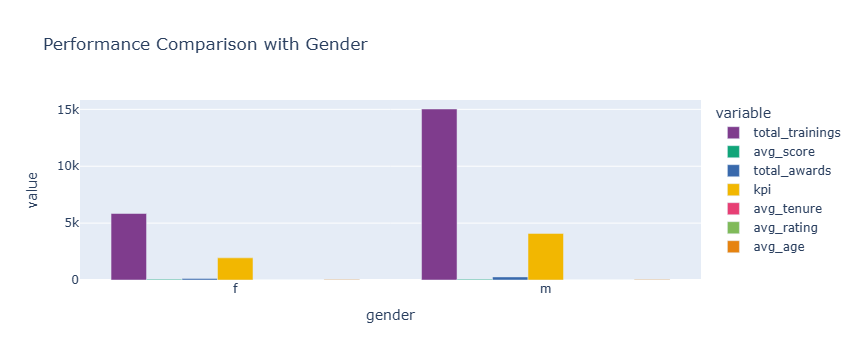

In [32]:
fig = px.bar(gender , x='gender' , y=['total_trainings' , 'avg_score' , 'total_awards' , 'kpi' , 'avg_tenure' , 'avg_rating' , 'avg_age']
             ,  title='Performance Comparison with Gender', barmode='group', color_discrete_sequence=px.colors.qualitative.Bold)

fig.show()

### `Insights`

- Male employees uderwent more trainings
- Both genders have almost similar average training score
- Average age for both genders is 35
- Average tenure is about 6.2 years
- Male employees achieved more KPIs
- Male employee got more awards

---

## Performance by departments

In [33]:
dep = df.groupby('departments').agg(

    total_trainings = ('total_trainings' , 'sum'),
    avg_score = ('avg_score' , 'mean') ,
    kpi = ('kpi > 80' , 'sum'),
    avg_tenure = ('tenure' , 'mean'),
    avg_rating = ('previous_rating' , 'mean'),
    avg_age = ('age' , 'mean')

).reset_index()


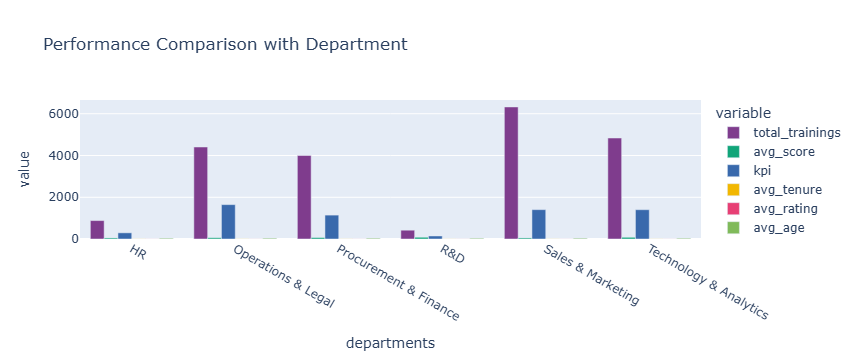

In [34]:
fig = px.bar(dep , x='departments' , y=['total_trainings' , 'avg_score' , 'kpi' , 'avg_tenure' , 'avg_rating' , 'avg_age'],
              title='Performance Comparison with Department', barmode='group', color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()

### `Insights`

- R&D department has more training score
- Operations and Legal department has more older employees with average age of 36.5
- Average tenure for employees is highest at Operations and Legal department which is 6.6
- Operations and Legal department has achieved more KPIs
- Male employees achieved more KPIs
- Sales and Marketing got more awards

---

## Employee Comparison wth respect to Education

In [35]:
emp = df.groupby('education').agg(

    total_trainings = ('total_trainings' , 'sum'),
    avg_score = ('avg_score' , 'mean') ,
    kpi = ('kpi > 80' , 'sum'),
    avg_tenure = ('tenure' , 'mean')


).reset_index()

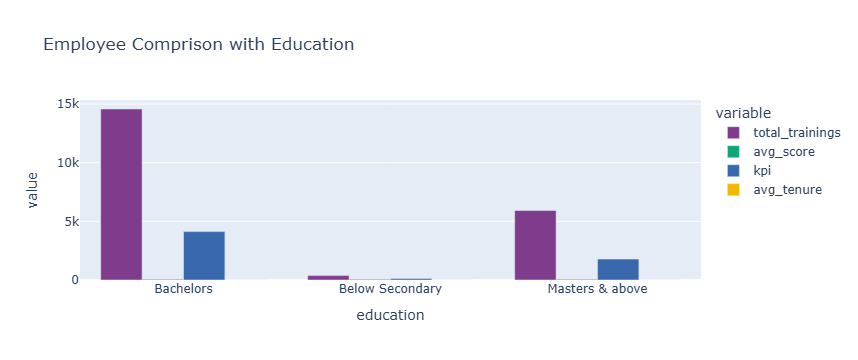

In [36]:
fig = px.bar(emp , x='education' , y=['total_trainings' , 'avg_score' , 'kpi' , 'avg_tenure'],
             title='Employee Comprison with Education', barmode='group', color_discrete_sequence=px.colors.qualitative.Bold)

fig.show()

### `Insights`

- Employees with below secondary education requires more training
- Employees with below secondary education have more training scores (maybe because they attend more trainings)
- Employees with masters and above have longer average tenures
- Employees with bachelors achieved more KPIs
- Employees with bachelors have more awards

---

## Employee comparison with Province

In [37]:
pro = df.groupby('province').agg(

    total_trainings = ('total_trainings' , 'sum'),
    avg_score = ('avg_score' , 'mean') ,
    kpi = ('kpi > 80' , 'sum')

).reset_index()

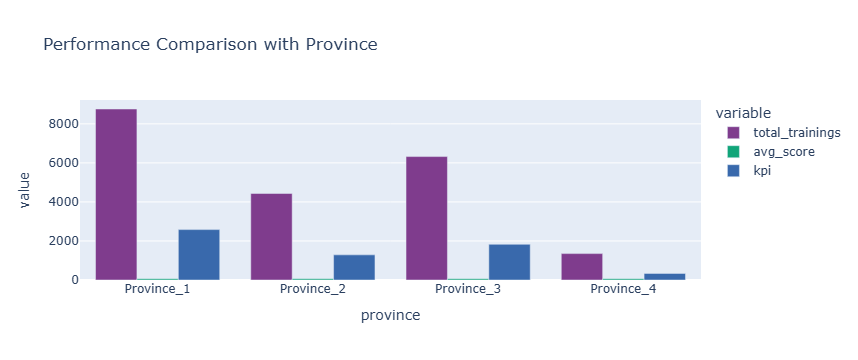

In [38]:
fig = px.bar(pro , x='province' , y=['total_trainings' , 'avg_score' , 'kpi'],
              title='Performance Comparison with Province', barmode='group', color_discrete_sequence=px.colors.qualitative.Bold)

fig.show()

### `Insights`

- Employees from Province_3 requires more training
- Employees from Province_1 achieved more KPIs
- Employees from Province have more training scores

---

## Previous rating and average training score


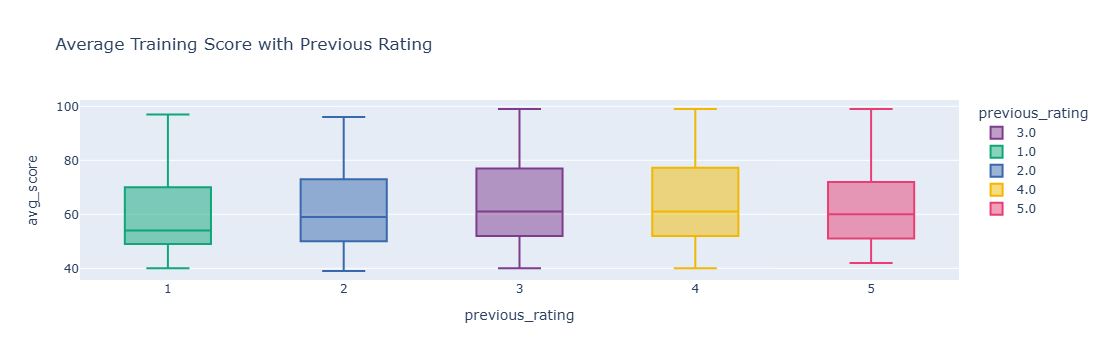

In [39]:

# creating a boxplot to visualize the relationship between Previous Rating and Average training scorefig =
fig =  px.box(df , x='previous_rating' , y='avg_score' , color='previous_rating' ,
              title='Average Training Score with Previous Rating' , color_discrete_sequence=px.colors.qualitative.Bold)


fig.show()